In [1]:
import pandas as pd 
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r"C:\Users\araca\Documents\UNIVERSIDAD\PROYECTO DE DATOS I\df_peleas_limpio.csv")
df = df.iloc[:len(df)//2]

df

,Unnamed: 0.1,index,Unnamed: 0,Peleador_A,Peleador_B,DATE,CATEGORY,WINNER,TIME,ROUND,...,TITLE_FIGHT,WOMEN,METHOD_DQ,METHOD_Decision - Majority,METHOD_Decision - Split,METHOD_Decision - Unanimous,METHOD_KO/TKO,METHOD_Overturned,METHOD_Submission,METHOD_TKO - Doctor's Stoppage
0,0,2517,2517,Laverne Clark,Frank Caracci,1999-01-08,LIGHTWEIGHT,False,412,1,...,False,False,False,False,False,False,True,False,False,False
1,1,2516,2516,Evan Tanner,Darrel Gholar,1999-01-08,MIDDLEWEIGHT,False,477,1,...,False,False,False,False,False,False,False,False,True,False
2,2,2515,2515,Mikey Burnett,Townsend Saunders,1999-01-08,LIGHTWEIGHT,False,180,2,...,False,False,False,False,False,True,False,False,False,False
3,3,2514,2514,Tito Ortiz,Jerry Bohlander,1999-01-08,MIDDLEWEIGHT,False,151,2,...,False,False,False,False,False,False,False,False,False,True
4,4,2513,2513,Pedro Rizzo,Mark Coleman,1999-01-08,HEAVYWEIGHT,False,180,2,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7839,7839,2521,2521,Jimmy Crute,Rodolfo Bellato,2025-02-15,LIGHTHEAVYWEIGHT,True,300,3,...,False,False,False,True,False,False,False,False,False,False
7840,7840,2520,2520,Justin Tafa,Tallison Teixeira,2025-02-15,HEAVYWEIGHT,True,35,1,...,False,False,False,False,False,False,True,False,False,False
7841,7841,2519,2519,Zhang Weili,Tatiana Suarez,2025-02-15,STRAWWEIGHT,False,300,5,...,True,True,False,False,False,True,False,False,False,False
7842,7842,2518,2518,Dricus Du Plessis,Sean Strickland,2025-02-15,MIDDLEWEIGHT,False,300,5,...,True,False,False,False,False,True,False,False,False,False


In [8]:
df.columns

Index(['Unnamed: 0.1', 'index', 'Unnamed: 0', 'Peleador_A', 'Peleador_B',
       'DATE', 'CATEGORY', 'WINNER', 'TIME', 'ROUND', 'KD_A', 'KD_B',
       'SIG_STR_A', 'SIG_STR_B', 'TD_PORC_A', 'TD_PORC_B', 'SUB_ATT_A',
       'SUB_ATT_B', 'REV_A', 'REV_B', 'CTRL_A', 'CTRL_B', 'TOTAL_STR_A_x',
       'TOTAL_STR_A_y', 'TOTAL_STR_B_x', 'TOTAL_STR_B_y', 'TD_A_x', 'TD_A_y',
       'TD_B_x', 'TD_B_y', 'STR_HEAD_A_x', 'STR_HEAD_A_y', 'STR_HEAD_B_x',
       'STR_HEAD_B_y', 'STR_BODY_A_x', 'STR_BODY_A_y', 'STR_BODY_B_x',
       'STR_BODY_B_y', 'STR_LEG_A_x', 'STR_LEG_A_y', 'STR_LEG_B_x',
       'STR_LEG_B_y', 'STR_DISTANCE_A_x', 'STR_DISTANCE_A_y',
       'STR_DISTANCE_B_x', 'STR_DISTANCE_B_y', 'STR_CLINCH_A_x',
       'STR_CLINCH_A_y', 'STR_CLINCH_B_x', 'STR_CLINCH_B_y', 'STR_GROUND_A_x',
       'STR_GROUND_A_y', 'STR_GROUND_B_x', 'STR_GROUND_B_y', 'KD_DIFF',
       'SIG_STR_DIFF', 'TD_DIFF', 'SUB_ATT_DIFF', 'REV_DIFF', 'CTRL_DIFF',
       'STRIKER_A', 'STRIKER_B', 'GRAPPLER_A', 'GRAPPLER_B', 'TI

Este análisis te permitirá visualizar la distribución de victorias entre los peleadores A y B. Es útil para entender el balance de los resultados en tu conjunto de datos, es decir, si hay un sesgo hacia uno de los peleadores. Esto puede ser importante para evaluar la equidad de los combates y para ajustar modelos predictivos, asegurando que no estén sesgados hacia uno de los peleadores.

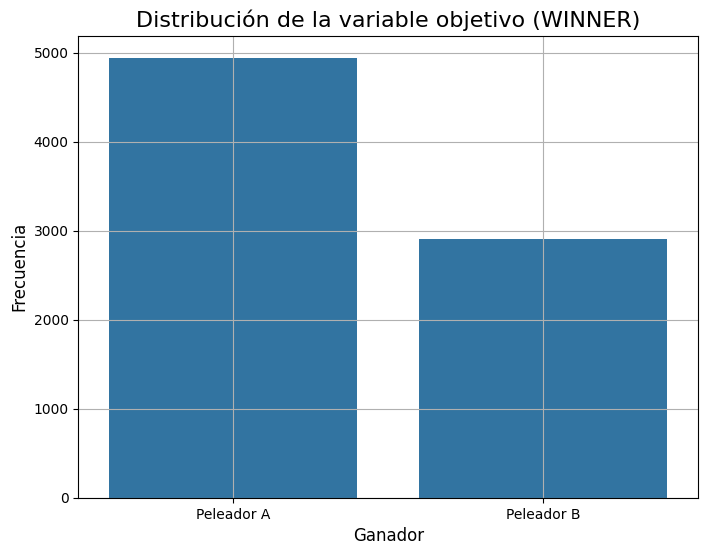

In [ ]:
# Visualización de la distribución de la variable objetivo (WINNER)
plt.figure(figsize=(8, 6))
sns.countplot(x='WINNER', data=df)
plt.title('Distribución de la variable objetivo (WINNER)', fontsize=16)
plt.xlabel('Ganador', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks([0, 1], ['Peleador A', 'Peleador B'])
plt.grid(True)
plt.savefig(r'C:\Users\araca\Documents\UNIVERSIDAD\PROYECTO DE DATOS I\Imagenes\Distribución de la variable objetivo (WINNER).png')
plt.show()

El gráfico muestra la distribución de victorias entre los peleadores A y B. Observamos que el peleador A gana con una frecuencia cercana a 5000, mientras que el peleador B gana aproximadamente 3000 veces. Este desbalance notable en las victorias sugiere que el peleador A tiene una ventaja competitiva en los datos analizados. Este desbalance debe ser considerado al desarrollar un modelo predictivo, ya que un modelo entrenado en estos datos podría estar sesgado hacia predecir victorias del peleador A con mayor frecuencia. Es importante aplicar técnicas de balanceo de datos, como el sobremuestreo de las victorias del peleador B o el submuestreo de las victorias del peleador A, para asegurar que el modelo sea justo y preciso. Además, sería útil investigar las razones detrás de este desbalance, analizando otras variables como la categoría de peso, el tiempo de combate y las estadísticas de rendimiento para entender mejor por qué el peleador A tiene una tasa de victorias más alta. Este análisis inicial proporciona una base sólida para profundizar en los datos y ajustar el enfoque del modelo predictivo para mejorar su precisión y equidad.

Este análisis sirve para visualizar la distribución de los golpes significativos entre los peleadores A y B según el resultado del combate. Al comparar las densidades de los golpes significativos de los ganadores y perdedores, podemos identificar patrones y diferencias en el rendimiento de los peleadores.

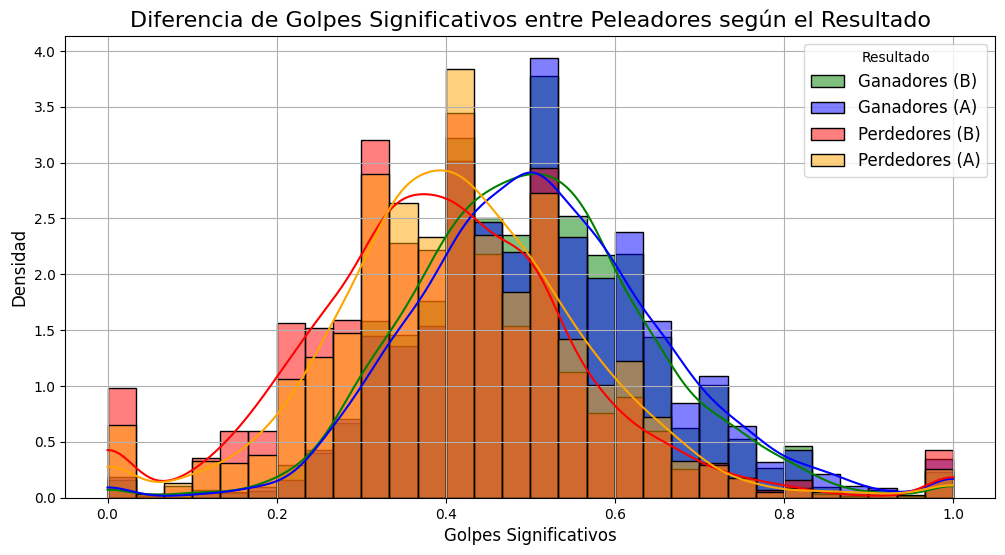

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['WINNER'] == True]['SIG_STR_B'], kde=True, color='green', bins=30, stat="density", label='Ganadores (B)')
sns.histplot(df[df['WINNER'] == False]['SIG_STR_A'], kde=True, color='blue', bins=30, stat="density", label='Ganadores (A)')
sns.histplot(df[df['WINNER'] == False]['SIG_STR_B'], kde=True, color='red', bins=30, stat="density", label='Perdedores (B)')
sns.histplot(df[df['WINNER'] == True]['SIG_STR_A'], kde=True, color='orange', bins=30, stat="density", label='Perdedores (A)')
plt.title("Diferencia de Golpes Significativos entre Peleadores según el Resultado", fontsize=16)
plt.xlabel("Golpes Significativos", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Resultado", fontsize=12)
plt.grid(True)
plt.savefig(r'C:\Users\araca\Documents\UNIVERSIDAD\PROYECTO DE DATOS I\Imagenes\Diferencia de Golpes Significativos entre Peleadores según el Resultado.png')
plt.show()

El gráfico muestra que los ganadores (tanto A como B) tienden a tener una mayor densidad de golpes significativos en comparación con los perdedores. Esto sugiere que la cantidad de golpes significativos es un factor importante en la determinación del ganador de un combate. 

Este análisis compara el promedio de golpes significativos en diferentes zonas del cuerpo (cabeza, cuerpo y piernas) entre los ganadores y perdedores de los combates. Al visualizar estos promedios, podemos identificar patrones y tendencias en las estrategias de los peleadores que conducen a la victoria. El gráfico de barras agrupadas muestra cómo se distribuyen los golpes significativos en cada zona del cuerpo para los ganadores y perdedores, permitiendo una comparación clara y directa entre ambos grupos.

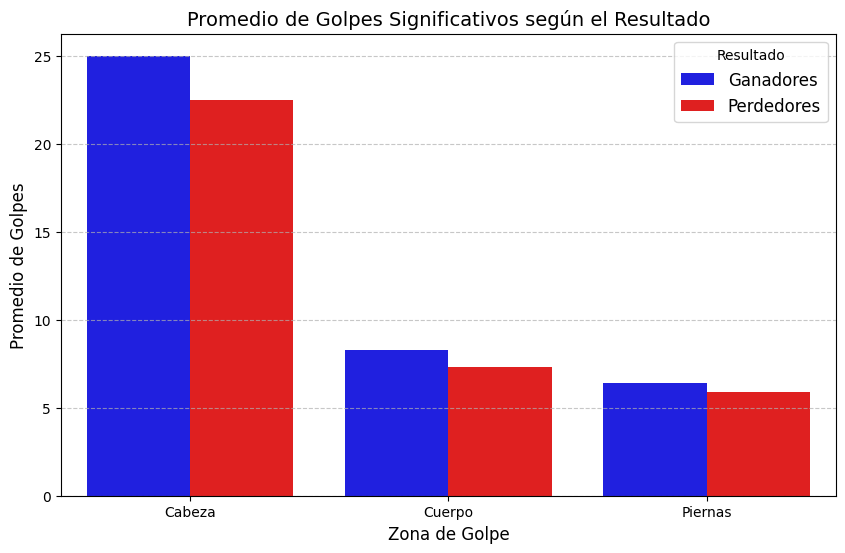

In [28]:
# Calcular el promedio de golpes efectivos en cada zona según el resultado de la pelea
golpes = {
    "Cabeza": ["STR_HEAD_A_x", "STR_HEAD_B_x"],
    "Cuerpo": ["STR_BODY_A_x", "STR_BODY_B_x"],
    "Piernas": ["STR_LEG_A_x", "STR_LEG_B_x"]
}

datos = []
for zona, columnas in golpes.items():
    golpes_ganadores = df[df["WINNER"] == True][columnas].mean().mean()
    golpes_perdedores = df[df["WINNER"] == False][columnas].mean().mean()
    datos.append([zona, "Ganadores", golpes_ganadores])
    datos.append([zona, "Perdedores", golpes_perdedores])

df_plot = pd.DataFrame(datos, columns=["Zona de Golpe", "Resultado", "Promedio de Golpes"])

# Crear gráfico de barras agrupadas
plt.figure(figsize=(10,6))
sns.barplot(data=df_plot, x="Zona de Golpe", y="Promedio de Golpes", hue="Resultado", 
            palette={"Ganadores": "blue", "Perdedores": "red"})

# Ajustes visuales
plt.title("Promedio de Golpes Significativos según el Resultado", fontsize=14)
plt.xlabel("Zona de Golpe", fontsize=12)
plt.ylabel("Promedio de Golpes", fontsize=12)
plt.legend(title="Resultado", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig(r'C:\Users\araca\Documents\UNIVERSIDAD\PROYECTO DE DATOS I\Imagenes\Promedio de Golpes Significativos según el Resultado.png')
# Mostrar gráfico
plt.show()

Este análisis muestra que los golpes a la cabeza son los más frecuentes y parecen ser clave para ganar un combate, con los ganadores promediando alrededor de 25 golpes en esta zona. Los golpes al cuerpo y a las piernas son menos frecuentes, con promedios entre 5 y 10 tanto para ganadores como para perdedores. Esto sugiere que la efectividad en los golpes a la cabeza es un indicador importante del éxito en los combates.

La mayor cantidad de golpes significativos en la cabeza está asociada con una mayor probabilidad de ganar un combate, mientras que los golpes al cuerpo y a las piernas tienen un impacto menor en el resultado. 

Este análisis sirve para comparar el número de derribos (knockdowns) realizados por los peleadores A y B según el resultado del combate. Al visualizar estos datos, podemos identificar si hay una relación entre la cantidad de derribos y la probabilidad de ganar un combate.

El primer gráfico muestra el número de derribos realizados por el peleador A en combates ganados y perdidos, mientras que el segundo gráfico hace lo mismo para el peleador B. Estos gráficos permiten comparar la efectividad de los derribos entre los ganadores y perdedores, proporcionando información valiosa sobre la importancia de los derribos en la determinación del resultado de un combate.

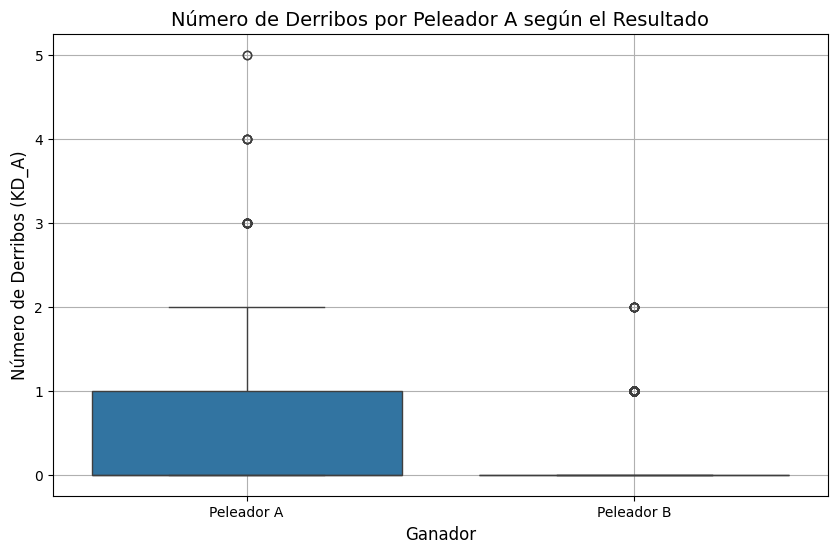

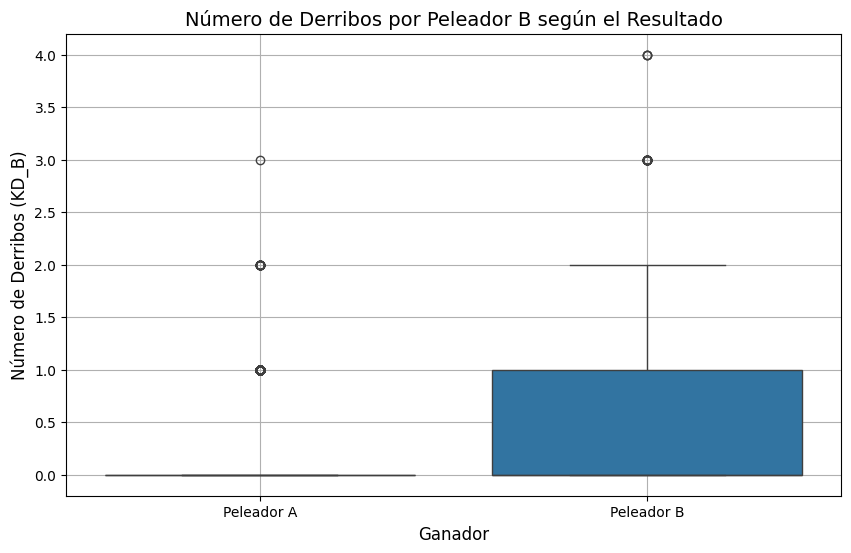

In [30]:
# Número de Derribos por Peleador A según el Resultado
plt.figure(figsize=(10, 6))
sns.boxplot(x='WINNER', y='KD_A', data=df)
plt.title('Número de Derribos por Peleador A según el Resultado', fontsize=14)
plt.xlabel('Ganador', fontsize=12)
plt.ylabel('Número de Derribos (KD_A)', fontsize=12)
plt.xticks([0, 1], ['Peleador A', 'Peleador B'])
plt.grid(True)
plt.savefig(r'C:\Users\araca\Documents\UNIVERSIDAD\PROYECTO DE DATOS I\Imagenes\Número de Derribos por Peleador A según el Resultado.png')
plt.show()

# Número de Derribos por Peleador B según el Resultado
plt.figure(figsize=(10, 6))
sns.boxplot(x='WINNER', y='KD_B', data=df)
plt.title('Número de Derribos por Peleador B según el Resultado', fontsize=14)
plt.xlabel('Ganador', fontsize=12)
plt.ylabel('Número de Derribos (KD_B)', fontsize=12)
plt.xticks([0, 1], ['Peleador A', 'Peleador B'])
plt.grid(True)
plt.savefig(r'C:\Users\araca\Documents\UNIVERSIDAD\PROYECTO DE DATOS I\Imagenes\Número de Derribos por Peleador B según el Resultado.png')
plt.show()

Este análisis muestra que el ganador de la pelea tiende a realizar un mayor número de derribos. Sin embargo, se observa una diferencia en el comportamiento de los peleadores A y B. El peleador A, cuando gana, realiza un mayor número de derribos en comparación con el peleador B cuando gana. Por otro lado, cuando el peleador A pierde, el peleador B suele realizar algunos derribos adicionales. Esto sugiere que los derribos son un factor importante en la victoria, pero también que el peleador A depende más de los derribos para ganar en comparación con el peleador B. Esta información puede ser útil para ajustar estrategias de combate y mejorar el rendimiento de los peleadores.

Este análisis te permite visualizar y comparar el porcentaje de derribos exitosos (takedowns) de los peleadores A y B según el resultado de la pelea. Al utilizar gráficos de caja (boxplots), puedes identificar la distribución y variabilidad de los porcentajes de derribos exitosos para ambos peleadores, dependiendo de si ganaron o perdieron la pelea. En resumen, con este análisis puedes evaluar el rendimiento de los peleadores en términos de derribos exitosos, ver cómo el porcentaje de derribos exitosos se relaciona con el resultado de la pelea, identificar patrones y tendencias, determinar si hay una diferencia significativa en los porcentajes de derribos exitosos entre los peleadores ganadores y perdedores, y tomar decisiones informadas utilizando esta información para mejorar estrategias de entrenamiento y tácticas de pelea, enfocándose en los aspectos que más influyen en el éxito de los derribos.

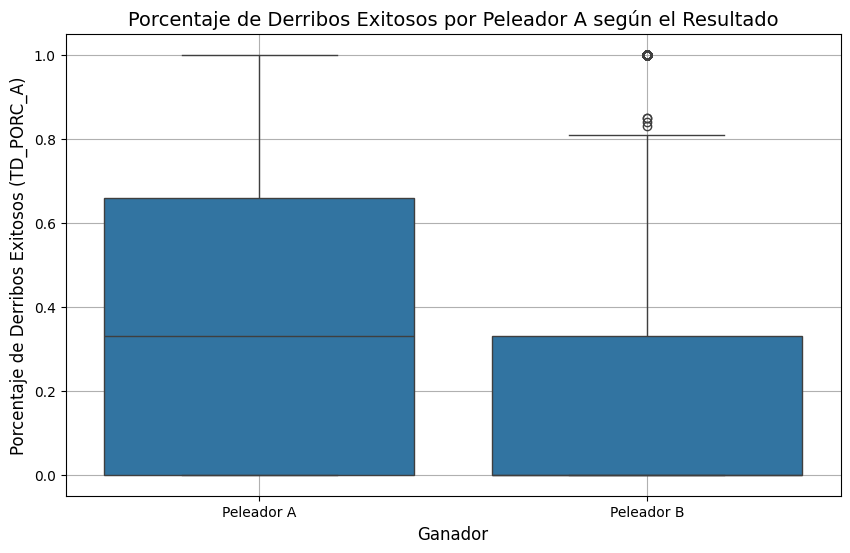

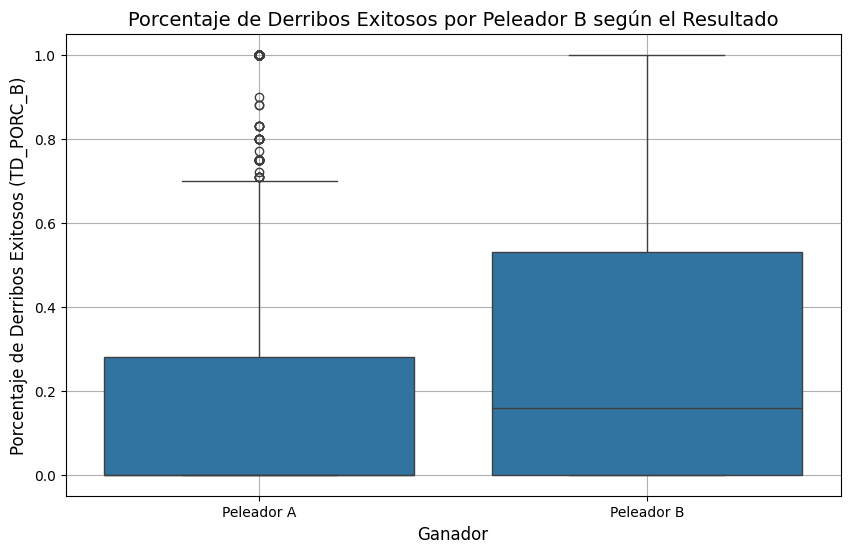

In [31]:
# Porcentaje de Derribos Exitosos por Peleador A según el Resultado
plt.figure(figsize=(10, 6))
sns.boxplot(x='WINNER', y='TD_PORC_A', data=df)
plt.title('Porcentaje de Derribos Exitosos por Peleador A según el Resultado', fontsize=14)
plt.xlabel('Ganador', fontsize=12)
plt.ylabel('Porcentaje de Derribos Exitosos (TD_PORC_A)', fontsize=12)
plt.xticks([0, 1], ['Peleador A', 'Peleador B'])
plt.grid(True)
plt.savefig(r'C:\Users\araca\Documents\UNIVERSIDAD\PROYECTO DE DATOS I\Imagenes\Porcentaje de Derribos Exitosos por Peleador A según el Resultado.png')

plt.show()

# Porcentaje de Derribos Exitosos por Peleador B según el Resultado
plt.figure(figsize=(10, 6))
sns.boxplot(x='WINNER', y='TD_PORC_B', data=df)
plt.title('Porcentaje de Derribos Exitosos por Peleador B según el Resultado', fontsize=14)
plt.xlabel('Ganador', fontsize=12)
plt.ylabel('Porcentaje de Derribos Exitosos (TD_PORC_B)', fontsize=12)
plt.xticks([0, 1], ['Peleador A', 'Peleador B'])
plt.grid(True)
plt.savefig(r'C:\Users\araca\Documents\UNIVERSIDAD\PROYECTO DE DATOS I\Imagenes\Porcentaje de Derribos Exitosos por Peleador B según el Resultado.png')

plt.show()

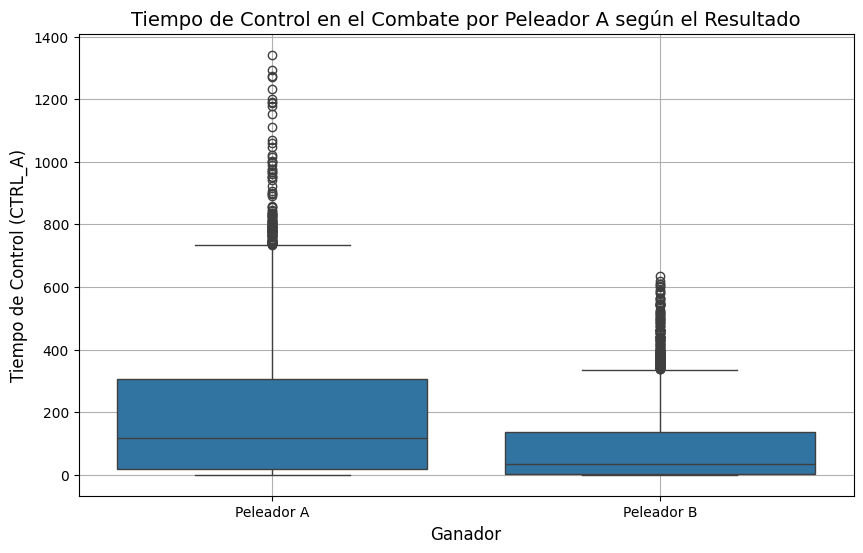

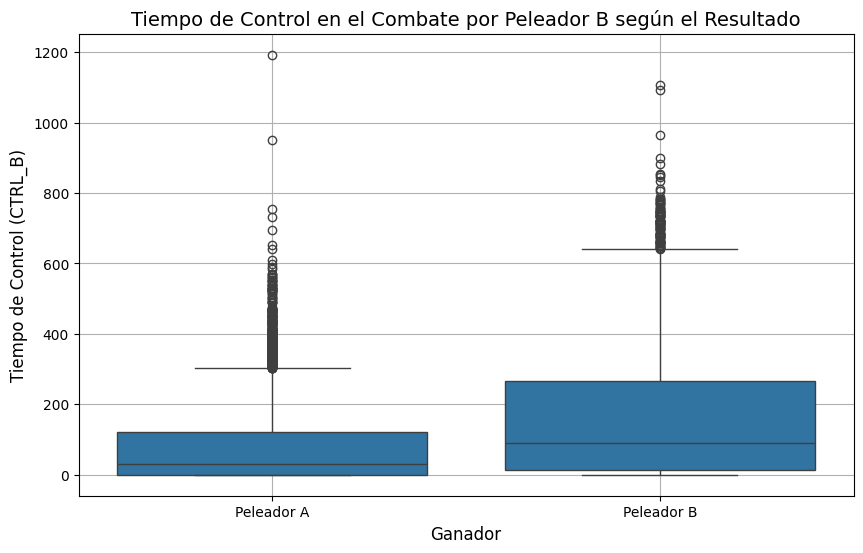

In [32]:
# Tiempo de Control en el Combate por Peleador A según el Resultado
plt.figure(figsize=(10, 6))
sns.boxplot(x='WINNER', y='CTRL_A', data=df)
plt.title('Tiempo de Control en el Combate por Peleador A según el Resultado', fontsize=14)
plt.xlabel('Ganador', fontsize=12)
plt.ylabel('Tiempo de Control (CTRL_A)', fontsize=12)
plt.xticks([0, 1], ['Peleador A', 'Peleador B'])
plt.grid(True)
plt.savefig(r'C:\Users\araca\Documents\UNIVERSIDAD\PROYECTO DE DATOS I\Imagenes\Tiempo de Control en el Combate por Peleador A según el Resultado.png')
plt.show()

# Tiempo de Control en el Combate por Peleador B según el Resultado
plt.figure(figsize=(10, 6))
sns.boxplot(x='WINNER', y='CTRL_B', data=df)
plt.title('Tiempo de Control en el Combate por Peleador B según el Resultado', fontsize=14)
plt.xlabel('Ganador', fontsize=12)
plt.ylabel('Tiempo de Control (CTRL_B)', fontsize=12)
plt.xticks([0, 1], ['Peleador A', 'Peleador B'])
plt.grid(True)
plt.savefig(r'C:\Users\araca\Documents\UNIVERSIDAD\PROYECTO DE DATOS I\Imagenes\Tiempo de Control en el Combate por Peleador B según el Resultado.png')
plt.show()

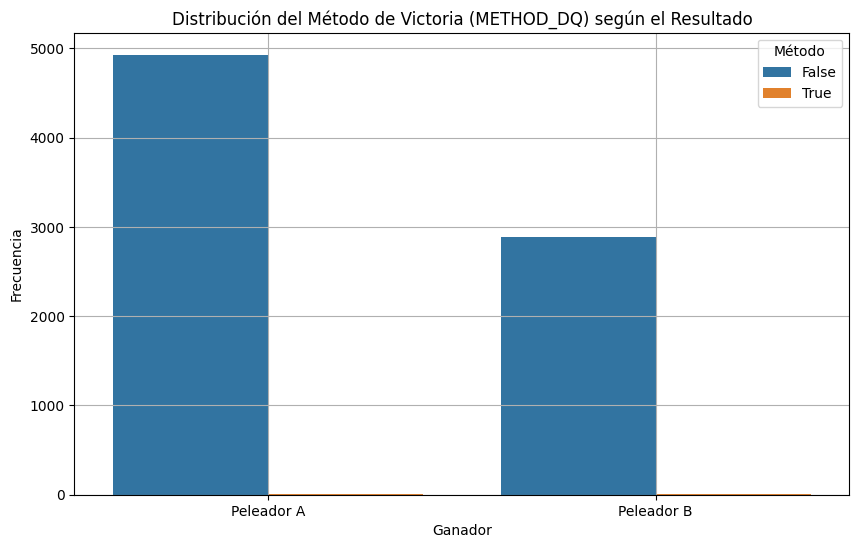

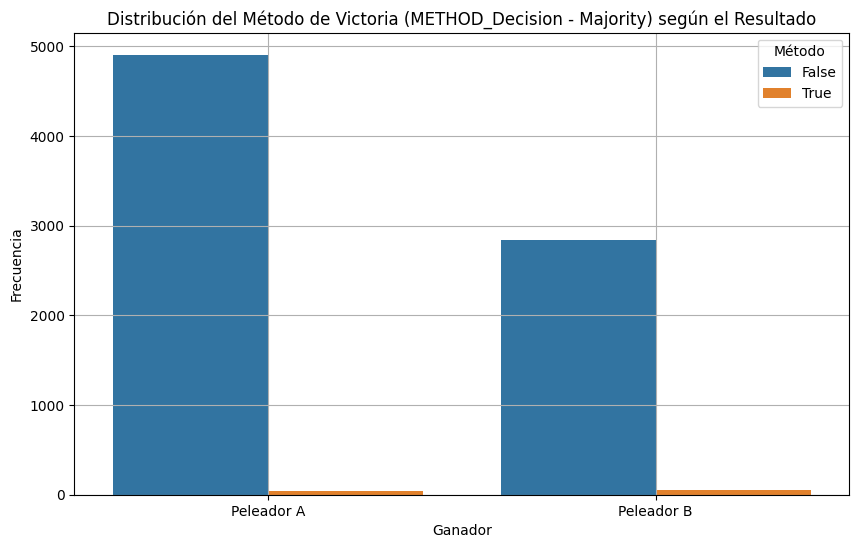

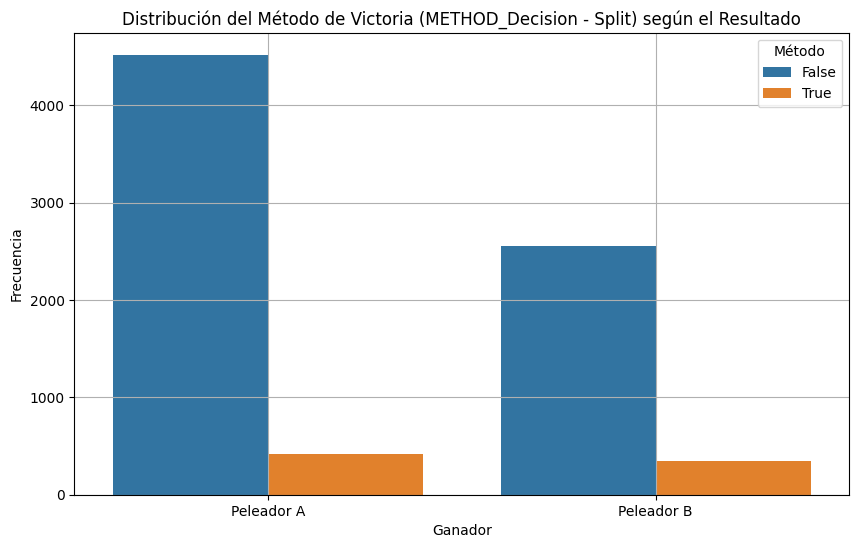

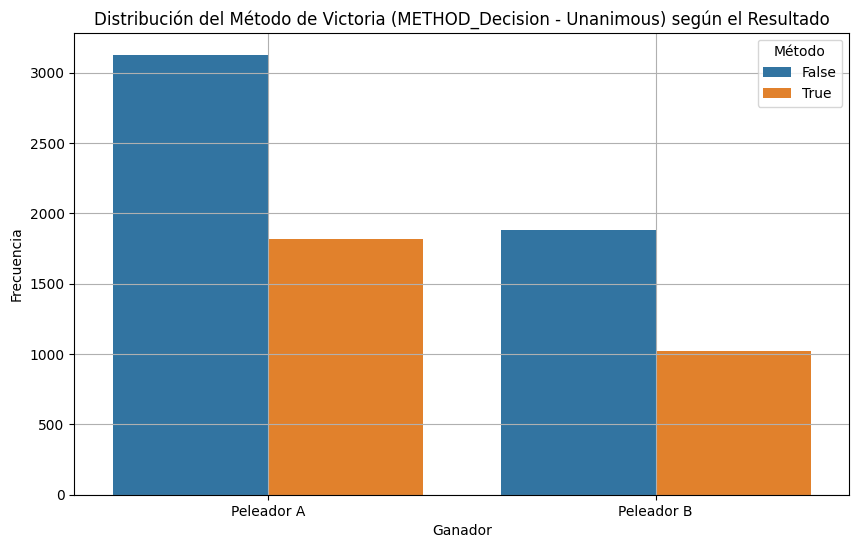

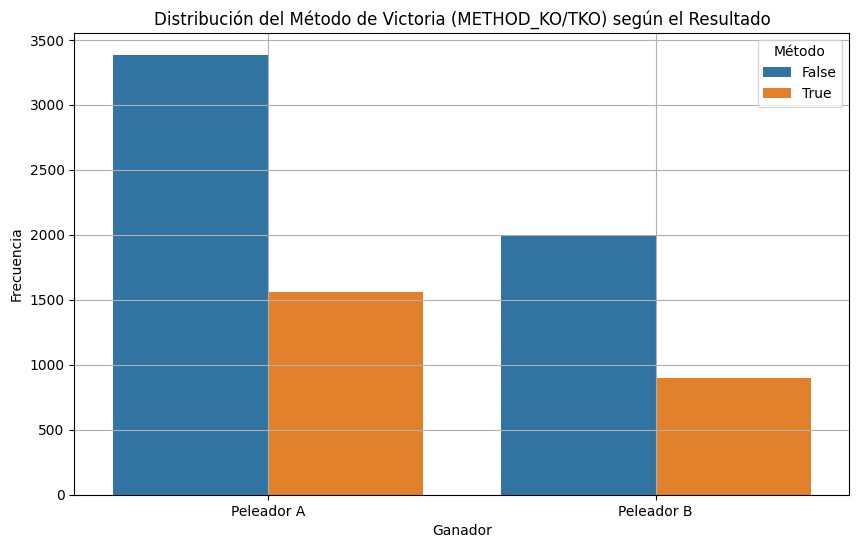

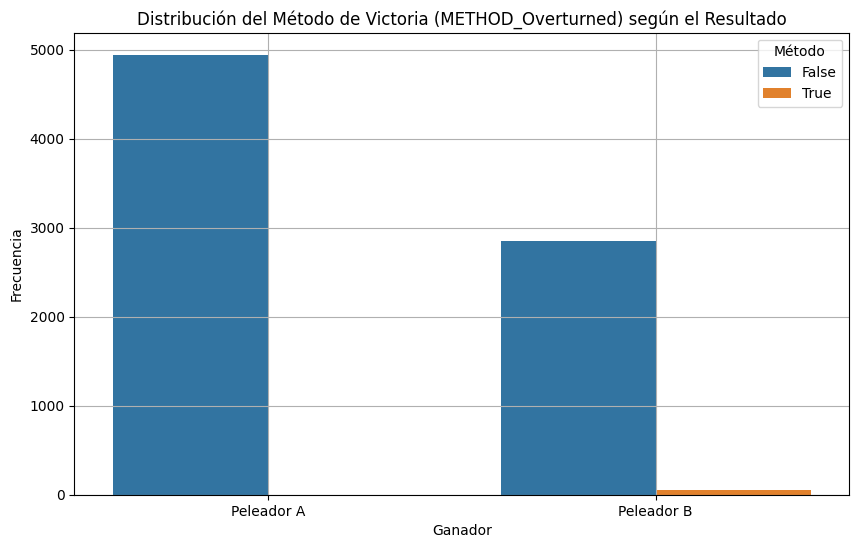

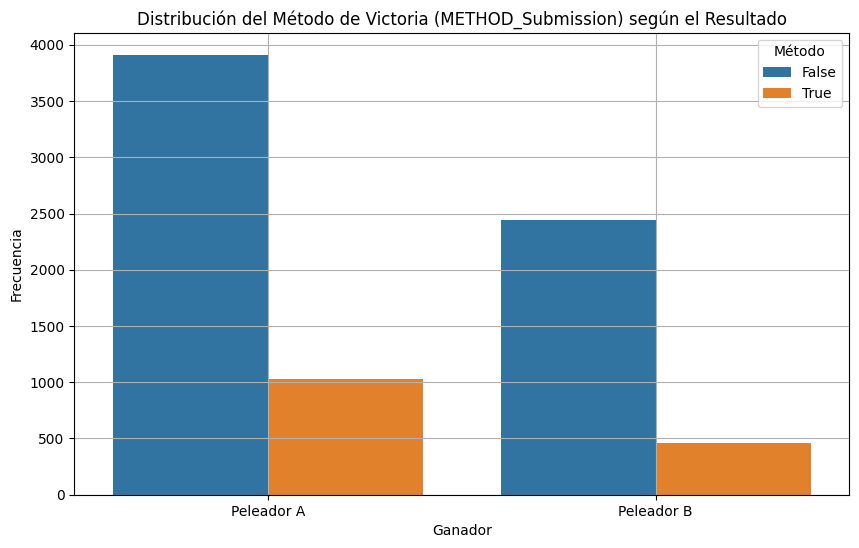

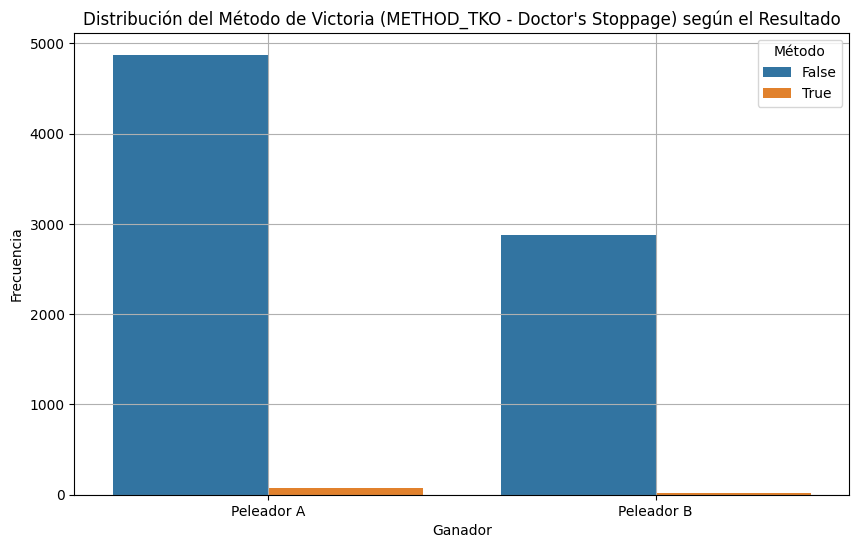

In [42]:
# Distribución del Método de Victoria según el Resultado
methods = ['METHOD_DQ', 'METHOD_Decision - Majority', 'METHOD_Decision - Split',
           'METHOD_Decision - Unanimous', 'METHOD_KO/TKO', 'METHOD_Overturned',
           'METHOD_Submission', "METHOD_TKO - Doctor's Stoppage"]

for method in methods:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='WINNER', hue=method, data=df)
    plt.title(f'Distribución del Método de Victoria ({method}) según el Resultado')
    plt.xlabel('Ganador')
    plt.ylabel('Frecuencia')
    plt.legend(title='Método')
    plt.xticks([0, 1], ['Peleador A', 'Peleador B'])
    plt.grid(True)
    if method!= 'METHOD_KO/TKO':
        plt.savefig(r'C:\Users\araca\Documents\UNIVERSIDAD\PROYECTO DE DATOS I\Imagenes\Distribución del Método de Victoria '+ method + ' según el Resultado.png')
    else:
        plt.savefig(r'C:\Users\araca\Documents\UNIVERSIDAD\PROYECTO DE DATOS I\Imagenes\Distribución del Método de Victoria METHOD_KO_TKO según el Resultado.png')
    plt.show()

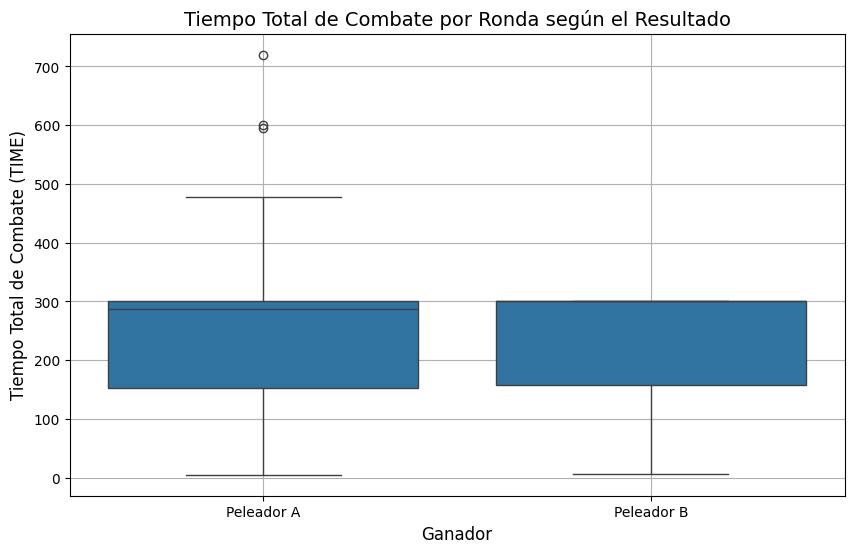

In [37]:

# Tiempo total de combate por ronda según el resultado
plt.figure(figsize=(10, 6))
sns.boxplot(x='WINNER', y='TIME', data=df)
plt.title('Tiempo Total de Combate por Ronda según el Resultado', fontsize=14)
plt.xlabel('Ganador', fontsize=12)
plt.ylabel('Tiempo Total de Combate (TIME)', fontsize=12)
plt.xticks([0, 1], ['Peleador A', 'Peleador B'])
plt.grid(True)
plt.savefig(r'C:\Users\araca\Documents\UNIVERSIDAD\PROYECTO DE DATOS I\Imagenes\Tiempo Total de Combate por Ronda según el Resultado.png')
plt.show()

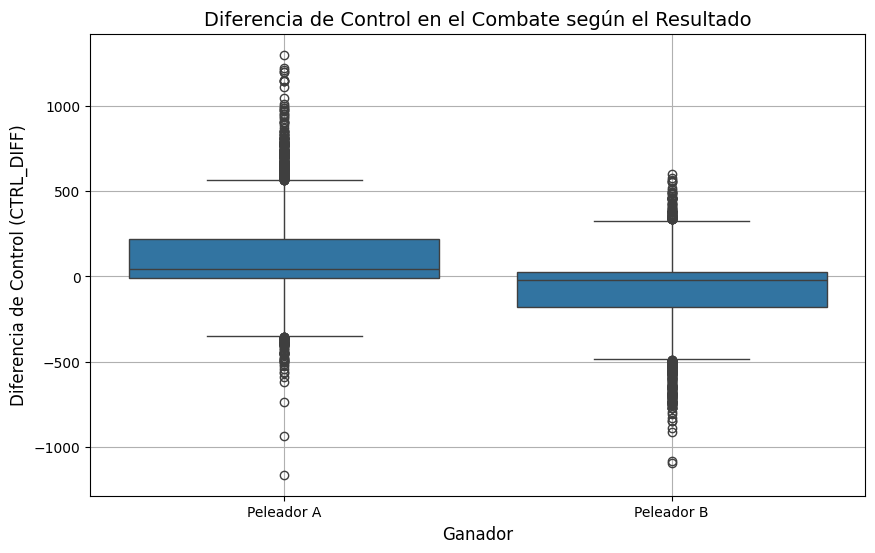

In [38]:
# Diferencia de Control en el Combate por Resultado
plt.figure(figsize=(10, 6))
sns.boxplot(x='WINNER', y='CTRL_DIFF', data=df)
plt.title('Diferencia de Control en el Combate según el Resultado', fontsize=14)
plt.xlabel('Ganador', fontsize=12)
plt.ylabel('Diferencia de Control (CTRL_DIFF)', fontsize=12)
plt.xticks([0, 1], ['Peleador A', 'Peleador B'])
plt.grid(True)
plt.savefig(r'C:\Users\araca\Documents\UNIVERSIDAD\PROYECTO DE DATOS I\Imagenes\Diferencia de Control en el Combate según el Resultado.png')
plt.show()

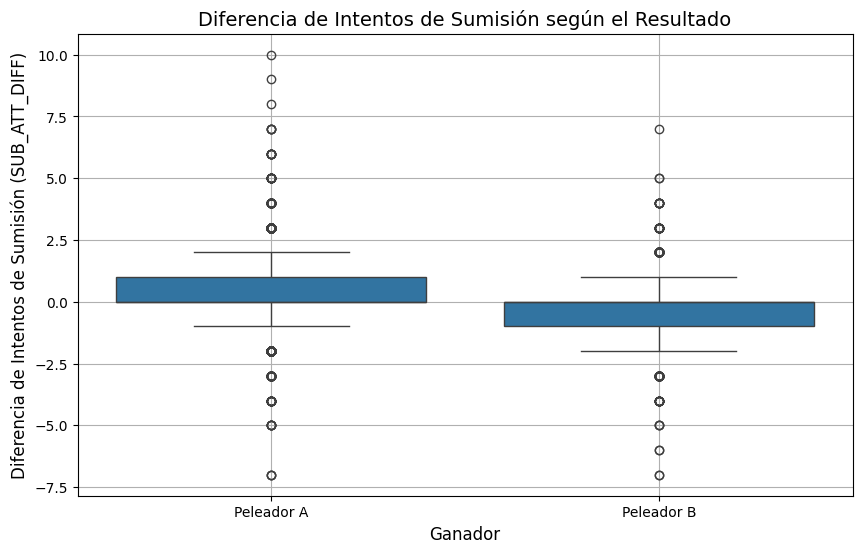

In [39]:
# Diferencia de Intentos de Sumisión por Resultado
plt.figure(figsize=(10, 6))
sns.boxplot(x='WINNER', y='SUB_ATT_DIFF', data=df)
plt.title('Diferencia de Intentos de Sumisión según el Resultado', fontsize=14)
plt.xlabel('Ganador', fontsize=12)
plt.ylabel('Diferencia de Intentos de Sumisión (SUB_ATT_DIFF)', fontsize=12)
plt.xticks([0, 1], ['Peleador A', 'Peleador B'])
plt.grid(True)
plt.savefig(r'C:\Users\araca\Documents\UNIVERSIDAD\PROYECTO DE DATOS I\Imagenes\Diferencia de Intentos de Sumisión según el Resultado.png')
plt.show()

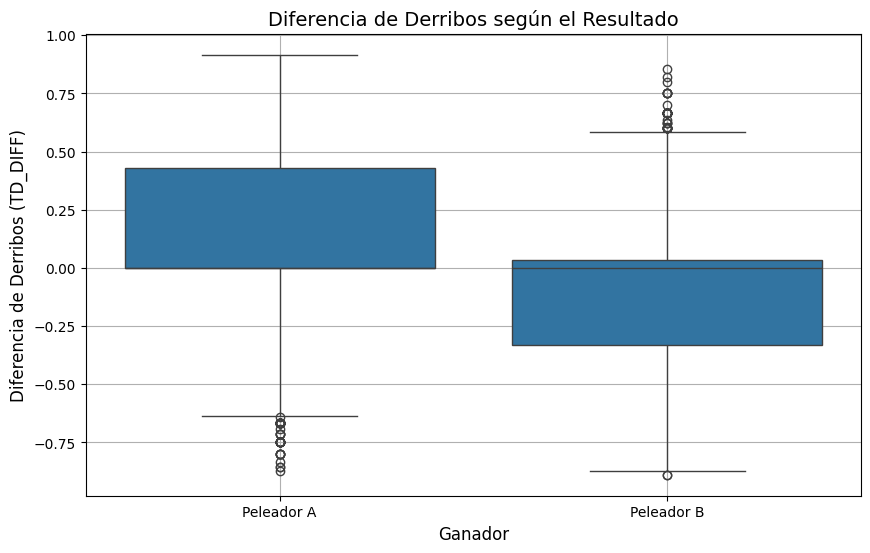

In [40]:
# Diferencia de Derribos por Resultado
plt.figure(figsize=(10, 6))
sns.boxplot(x='WINNER', y='TD_DIFF', data=df)
plt.title('Diferencia de Derribos según el Resultado', fontsize=14)
plt.xlabel('Ganador', fontsize=12)
plt.ylabel('Diferencia de Derribos (TD_DIFF)', fontsize=12)
plt.xticks([0, 1], ['Peleador A', 'Peleador B'])
plt.grid(True)
plt.savefig(r'C:\Users\araca\Documents\UNIVERSIDAD\PROYECTO DE DATOS I\Imagenes\Diferencia de Derribos según el Resultado.png')
plt.show()